<a href="https://colab.research.google.com/github/adivamsi2906/Assignment_5/blob/main/Welcome_to_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">
  <h1>Welcome to Colab!</h1>
</div>

If you're already familiar with Colab, check out this video to learn about interactive tables, the executed code history view and the command palette.

<center>
  <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y" target="_blank">
  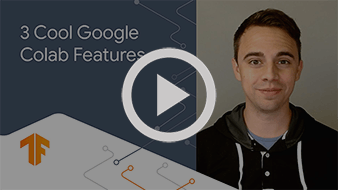
  </a>
</center>

In [2]:
!pip install cartopy
import cartopy

from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
from sklearn import metrics

# # # Question - 1
# Ignoring the warnings
warnings.filterwarnings("ignore")
# Reading dataset CC.csv
dataset = pd.read_csv('/content/Data/CC GENERAL.csv')
# Replacing null values with mean
dataset['MINIMUM_PAYMENTS'].fillna(dataset['MINIMUM_PAYMENTS'].mean(), inplace=True)
dataset['CREDIT_LIMIT'].fillna(dataset['CREDIT_LIMIT'].mean(), inplace=True)
# print(dataset.isnull().any())
x = dataset.iloc[:, 1:18]
# print(x)
# print(dataset['TENURE'].value_counts())
# Applying PCA on CC dataset
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, dataset[['TENURE']]], axis=1)
print('CC dataset finalDf:')
print(finalDf)
X = finalDf.drop('TENURE', axis=1).values
y = finalDf['TENURE'].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
y_train_hat =logisticRegr.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_hat)*100
print('Accuracy for our Training dataset with PCA is: %.4f %%' % train_accuracy)
# Applying k-means on PCA and Silhoutte score
nclusters = 2
km = KMeans(n_clusters=nclusters)
km.fit(x)
y_cluster_kmeans = km.predict(x)
score = metrics.silhouette_score(x, y_cluster_kmeans)
print('Silhouette Score =', score)
# Performing Scaling+PCA+K-Means and reporting the performance.
# Applying scaling
scaler = StandardScaler()
X_Scale = scaler.fit_transform(x)
# PCA
pca2 = PCA(n_components=2)
principalComponents = pca2.fit_transform(X_Scale)
principalDf_scale = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])
finalDf_scale = pd.concat([principalDf_scale, dataset[['TENURE']]], axis=1)
print('CC dataset after scaling finalDf:')
print(finalDf_scale)
nclusters = 2
km = KMeans(n_clusters=nclusters)
km.fit(X_Scale)
y_cluster_kmeans = km.predict(X_Scale)
score = metrics.silhouette_score(X_Scale, y_cluster_kmeans)
print('Silhouette Score after scaling =', score)
"""scaler = StandardScaler()
scaler.fit(x)
x_scaler = scaler.transform(x)
pca = PCA(2)
x_pca = pca.fit_transform(x_scaler)
df2 = pd.DataFrame(data=x_pca)
finaldf = pd.concat([df2, dataset[['TENURE']]], axis=1)
print(finaldf)
nclusters = 2
km = KMeans(n_clusters=nclusters)
km.fit(x_scaler)
y_cluster_kmeans = km.predict(x_scaler)
score = metrics.silhouette_score(x_scaler, y_cluster_kmeans)
print('Silhouette Score after scaling =', score)"""

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached Cartopy-0.21.1.tar.gz (10.9 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 50.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 4.6 MB/s eta 0:00:00
  Created wheel for cartopy: filename=Cartopy-0.21.1-cp39-cp39-linux_x86_64.whl size=11113638 sha256=2786af51c0a0a520159bde7ad863a0c3fbf4f002090577ca583ef6fe688d34e4
  Stored in directory: /root/.cache/pip/wheels/74/b9/f5/2c94acd7cd21480e6cf63169144d7aac3e8d9cf638225ed578
Successfully built cartopy
CC dataset finalDf:
      principal component 1  principal component 2  TENURE
0              -4326.383956             921.566884      12
1               4118.916676           -2432.846347      12
2               1497.907660           -1997.578692      12
3   

"scaler = StandardScaler()\nscaler.fit(x)\nx_scaler = scaler.transform(x)\npca = PCA(2)\nx_pca = pca.fit_transform(x_scaler)\ndf2 = pd.DataFrame(data=x_pca)\nfinaldf = pd.concat([df2, dataset[['TENURE']]], axis=1)\nprint(finaldf)\nnclusters = 2\nkm = KMeans(n_clusters=nclusters)\nkm.fit(x_scaler)\ny_cluster_kmeans = km.predict(x_scaler)\nscore = metrics.silhouette_score(x_scaler, y_cluster_kmeans)\nprint('Silhouette Score after scaling =', score)"

In [7]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import warnings

# # # Question - 2
# Ignoring the warnings
warnings.filterwarnings("ignore")
# Reading dataset pd_speech_features.csv
df = pd.read_csv("/content/Data/pd_speech_features.csv")
X = df.drop('class', axis=1).values
y = df['class'].values
# Apply scaling
scaler = StandardScaler()
X_Scale = scaler.fit_transform(X)
# PCA
pca2 = PCA(n_components=3)
principalComponents = pca2.fit_transform(X_Scale)
principalDf = pd.DataFrame(data=principalComponents,
                           columns=['principal component 1', 'principal component 2', 'principal component 3'])
finalDf = pd.concat([principalDf, df[['class']]], axis=1)
print('PD_Speech_Features dataset finalDf:')
print(finalDf)
# SVM
X_train, X_test, y_train, y_test = train_test_split(X_Scale, y, test_size=0.3, random_state=0)
svc = SVC(max_iter=1000)
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
print("SVM accuracy =", acc_svc)

PD_Speech_Features dataset finalDf:
     principal component 1  principal component 2  principal component 3  \
0               -10.047372               1.471076              -6.846404   
1               -10.637725               1.583751              -6.830976   
2               -13.516185              -1.253542              -6.818699   
3                -9.155084               8.833602              15.290904   
4                -6.764470               4.611468              15.637122   
..                     ...                    ...                    ...   
751              22.322682               6.481915               1.458754   
752              13.442877               1.449419               9.352291   
753               8.270265               2.391281              -0.908669   
754               4.011761               5.412256              -0.847128   
755               3.993114               6.072414              -2.020717   

     class  
0        1  
1        1  
2        1  

Iris dataset after applying LDA:
          LD1       LD2  class
0    9.423452 -0.513976      0
1    8.751900 -1.591678      0
2    8.973004 -1.068204      0
3    8.170186 -1.435135      0
4    9.249789 -0.136869      0
..        ...       ...    ...
145 -6.167264  2.006912      2
146 -6.462099  1.062334      2
147 -6.447135  2.055824      2
148 -7.018075  2.727998      2
149 -6.838386  2.108245      2

[150 rows x 3 columns]


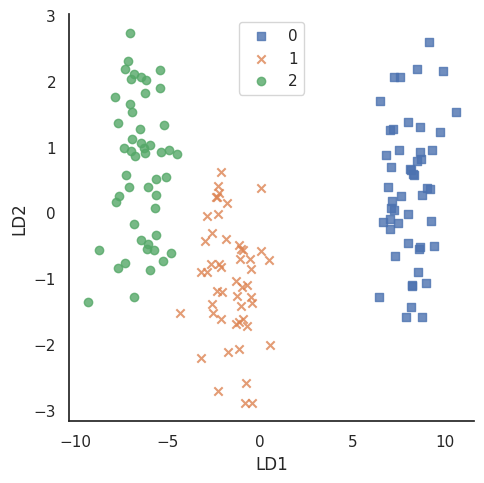

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from matplotlib import pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import warnings
import seaborn as sns
sns.set(style="white", color_codes=True)

# # # Question -3
# Ignoring the warnings
warnings.filterwarnings("ignore")
# Reading dataset Iris.csv
df = pd.read_csv("/content/Data/Iris.csv")
stdsc = StandardScaler()
# Applying LDA
X_train_std = stdsc.fit_transform(df.iloc[:, range(0, 4)].values)
class_le = LabelEncoder()
y = class_le.fit_transform(df['Species'].values)
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y)
data = pd.DataFrame(X_train_lda)
data['class'] = y
data.columns = ["LD1", "LD2", "class"]
print('Iris dataset after applying LDA:')
print(data)
markers = ['s', 'x', 'o']
colors = ['r', 'b', 'g']
sns.lmplot(x="LD1", y="LD2", data=data, hue='class', markers=markers, fit_reg=False, legend=False)
plt.legend(loc='upper center')
plt.show()

# # # Question - 4
# PCA performs better in case where number of samples per class is less,
# whereas LDA works better with large dataset having multiple classes.
# PCA is an unsupervised learning algorithm while LDA is a supervised learning algorithm.
     